[과제] Online_Retail 데이터셋으로 고객 세그먼테이션을 수행하세요.
- 필요한 데이터 전처리
- 적합한 파생변수 개발(feature engineering) - RFM
- 적합한 고객 그룹 파악(실루엣 계수 시각화 활용)

In [36]:
import pandas as pd
import datetime
import math
import numpy as np
import matplotlib.pyplot as plt

retail_df = pd.read_excel('./dataset/Online_Retail.xlsx')

In [37]:
print(retail_df.shape)
retail_df.head()

(541909, 8)


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [38]:
retail_df.isnull().sum()
# 고객이 null값인 부분 삭제필요

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [39]:
retail_df.dropna(subset=['CustomerID'],inplace=True)
retail_df.isnull().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

In [40]:
retail_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 406829 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    406829 non-null  object        
 1   StockCode    406829 non-null  object        
 2   Description  406829 non-null  object        
 3   Quantity     406829 non-null  int64         
 4   InvoiceDate  406829 non-null  datetime64[ns]
 5   UnitPrice    406829 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      406829 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 27.9+ MB


In [41]:
retail_df['Amount']=retail_df.UnitPrice * retail_df.Quantity
retail_df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Amount
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34


In [42]:
retail_df.loc[retail_df.CustomerID == 12346]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Amount
61619,541431,23166,MEDIUM CERAMIC TOP STORAGE JAR,74215,2011-01-18 10:01:00,1.04,12346.0,United Kingdom,77183.6
61624,C541433,23166,MEDIUM CERAMIC TOP STORAGE JAR,-74215,2011-01-18 10:17:00,1.04,12346.0,United Kingdom,-77183.6


In [43]:
retail_df.Country.value_counts()

United Kingdom          361878
Germany                   9495
France                    8491
EIRE                      7485
Spain                     2533
Netherlands               2371
Belgium                   2069
Switzerland               1877
Portugal                  1480
Australia                 1259
Norway                    1086
Italy                      803
Channel Islands            758
Finland                    695
Cyprus                     622
Sweden                     462
Austria                    401
Denmark                    389
Japan                      358
Poland                     341
USA                        291
Israel                     250
Unspecified                244
Singapore                  229
Iceland                    182
Canada                     151
Greece                     146
Malta                      127
United Arab Emirates        68
European Community          61
RSA                         58
Lebanon                     45
Lithuani

In [44]:
retail_df_1 = retail_df.loc[retail_df.Country=='United Kingdom']
retail_df_1

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Amount
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
...,...,...,...,...,...,...,...,...,...
541889,581585,22466,FAIRY TALE COTTAGE NIGHT LIGHT,12,2011-12-09 12:31:00,1.95,15804.0,United Kingdom,23.40
541890,581586,22061,LARGE CAKE STAND HANGING STRAWBERY,8,2011-12-09 12:49:00,2.95,13113.0,United Kingdom,23.60
541891,581586,23275,SET OF 3 HANGING OWLS OLLIE BEAK,24,2011-12-09 12:49:00,1.25,13113.0,United Kingdom,30.00
541892,581586,21217,RED RETROSPOT ROUND CAKE TINS,24,2011-12-09 12:49:00,8.95,13113.0,United Kingdom,214.80


In [45]:
df_1 = pd.DataFrame(retail_df_1.loc[retail_df.InvoiceNo.str.contains('C').isnull()].groupby('CustomerID')['InvoiceNo'].count())
df_1


,InvoiceNo
CustomerID,
12346.0,1
12747.0,103
12748.0,4596
12749.0,199
12820.0,59
...,...
18280.0,10
18281.0,7
18282.0,12


In [46]:
df_2 = pd.DataFrame(retail_df_1.loc[retail_df.InvoiceNo.str.contains('C').notnull()].groupby('CustomerID')['InvoiceNo'].count())
df_2.columns=['InvoiceNo2']
df_2

,InvoiceNo2
CustomerID,
12346.0,1
12748.0,46
12749.0,32
12822.0,1
12826.0,3
...,...
18272.0,4
18274.0,11
18276.0,2


In [47]:
df_3 = pd.concat([df_1,df_2],axis=1)
df_3

,InvoiceNo,InvoiceNo2
CustomerID,,
12346.0,1.0,1.0
12747.0,103.0,NaN
12748.0,4596.0,46.0
12749.0,199.0,32.0
12820.0,59.0,NaN
...,...,...
17448.0,NaN,1.0
17547.0,NaN,2.0
17820.0,NaN,5.0


In [48]:
df_3.dropna(subset=['InvoiceNo'],inplace=True)
df_3.replace(np.nan,0,inplace=True)
df_3['Frequency'] = df_3.InvoiceNo-df_3.InvoiceNo2
df_3


,InvoiceNo,InvoiceNo2,Frequency
CustomerID,,,
12346.0,1.0,1.0,0.0
12747.0,103.0,0.0,103.0
12748.0,4596.0,46.0,4550.0
12749.0,199.0,32.0,167.0
12820.0,59.0,0.0,59.0
...,...,...,...
18280.0,10.0,0.0,10.0
18281.0,7.0,0.0,7.0
18282.0,12.0,1.0,11.0


In [49]:
Monetary = retail_df.groupby('CustomerID')['Amount'].sum()
Monetary

CustomerID
12346.0       0.00
12347.0    4310.00
12348.0    1797.24
12349.0    1757.55
12350.0     334.40
            ...   
18280.0     180.60
18281.0      80.82
18282.0     176.60
18283.0    2094.88
18287.0    1837.28
Name: Amount, Length: 4372, dtype: float64

In [50]:
df_3['Monetary'] = Monetary
df_3

,InvoiceNo,InvoiceNo2,Frequency,Monetary
CustomerID,,,,
12346.0,1.0,1.0,0.0,0.00
12747.0,103.0,0.0,103.0,4196.01
12748.0,4596.0,46.0,4550.0,29072.10
12749.0,199.0,32.0,167.0,3868.20
12820.0,59.0,0.0,59.0,942.34
...,...,...,...,...
18280.0,10.0,0.0,10.0,180.60
18281.0,7.0,0.0,7.0,80.82
18282.0,12.0,1.0,11.0,176.60


In [51]:
Recency = retail_df.groupby('CustomerID')['InvoiceDate'].max()
Recency

CustomerID
12346.0   2011-01-18 10:17:00
12347.0   2011-12-07 15:52:00
12348.0   2011-09-25 13:13:00
12349.0   2011-11-21 09:51:00
12350.0   2011-02-02 16:01:00
                  ...        
18280.0   2011-03-07 09:52:00
18281.0   2011-06-12 10:53:00
18282.0   2011-12-02 11:43:00
18283.0   2011-12-06 12:02:00
18287.0   2011-10-28 09:29:00
Name: InvoiceDate, Length: 4372, dtype: datetime64[ns]

In [52]:
df_3['Recency'] = Recency
df_3

,InvoiceNo,InvoiceNo2,Frequency,Monetary,Recency
CustomerID,,,,,
12346.0,1.0,1.0,0.0,0.00,2011-01-18 10:17:00
12747.0,103.0,0.0,103.0,4196.01,2011-12-07 14:34:00
12748.0,4596.0,46.0,4550.0,29072.10,2011-12-09 12:20:00
12749.0,199.0,32.0,167.0,3868.20,2011-12-06 09:56:00
12820.0,59.0,0.0,59.0,942.34,2011-12-06 15:12:00
...,...,...,...,...,...
18280.0,10.0,0.0,10.0,180.60,2011-03-07 09:52:00
18281.0,7.0,0.0,7.0,80.82,2011-06-12 10:53:00
18282.0,12.0,1.0,11.0,176.60,2011-12-02 11:43:00


In [53]:
import datetime as dt
df_3['Recency'] = dt.datetime(2011,12,10)-df_3['Recency']
df_3

,InvoiceNo,InvoiceNo2,Frequency,Monetary,Recency
CustomerID,,,,,
12346.0,1.0,1.0,0.0,0.00,325 days 13:43:00
12747.0,103.0,0.0,103.0,4196.01,2 days 09:26:00
12748.0,4596.0,46.0,4550.0,29072.10,0 days 11:40:00
12749.0,199.0,32.0,167.0,3868.20,3 days 14:04:00
12820.0,59.0,0.0,59.0,942.34,3 days 08:48:00
...,...,...,...,...,...
18280.0,10.0,0.0,10.0,180.60,277 days 14:08:00
18281.0,7.0,0.0,7.0,80.82,180 days 13:07:00
18282.0,12.0,1.0,11.0,176.60,7 days 12:17:00


In [54]:
df_3['Recency'] = df_3['Recency'].apply(lambda x: x.days+1)
df_3

,InvoiceNo,InvoiceNo2,Frequency,Monetary,Recency
CustomerID,,,,,
12346.0,1.0,1.0,0.0,0.00,326
12747.0,103.0,0.0,103.0,4196.01,3
12748.0,4596.0,46.0,4550.0,29072.10,1
12749.0,199.0,32.0,167.0,3868.20,4
12820.0,59.0,0.0,59.0,942.34,4
...,...,...,...,...,...
18280.0,10.0,0.0,10.0,180.60,278
18281.0,7.0,0.0,7.0,80.82,181
18282.0,12.0,1.0,11.0,176.60,8


In [55]:
df_3.drop(['InvoiceNo','InvoiceNo2'],axis=1,inplace=True)
df_3

,Frequency,Monetary,Recency
CustomerID,,,
12346.0,0.0,0.00,326
12747.0,103.0,4196.01,3
12748.0,4550.0,29072.10,1
12749.0,167.0,3868.20,4
12820.0,59.0,942.34,4
...,...,...,...
18280.0,10.0,180.60,278
18281.0,7.0,80.82,181
18282.0,11.0,176.60,8


In [56]:
df_4 = df_3.drop(df_3[df_3.Monetary<=0].index,axis=0)
df_4.drop(df_4[df_4.Frequency<=0].index,axis=0,inplace=True)
df_4.reset_index(inplace=True)
df_4

,CustomerID,Frequency,Monetary,Recency
0,12747.0,103.0,4196.01,3
1,12748.0,4550.0,29072.10,1
2,12749.0,167.0,3868.20,4
3,12820.0,59.0,942.34,4
4,12821.0,6.0,92.72,215
...,...,...,...,...
3886,18280.0,10.0,180.60,278
3887,18281.0,7.0,80.82,181
3888,18282.0,11.0,176.60,8
3889,18283.0,756.0,2094.88,4


(array([3.34e+03, 3.44e+02, 9.60e+01, 3.50e+01, 2.50e+01, 7.00e+00,
        9.00e+00, 4.00e+00, 2.00e+00, 0.00e+00, 6.00e+00, 2.00e+00,
        1.00e+00, 4.00e+00, 1.00e+00, 1.00e+00, 0.00e+00, 0.00e+00,
        0.00e+00, 3.00e+00, 2.00e+00, 1.00e+00, 2.00e+00, 1.00e+00,
        1.00e+00, 1.00e+00, 0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00,
        0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00, 1.00e+00, 0.00e+00,
        0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00,
        0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00,
        0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00,
        0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00,
        0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00,
        0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00,
        0.00e+00, 1.00e+00, 0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00,
        0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00,
        0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00, 

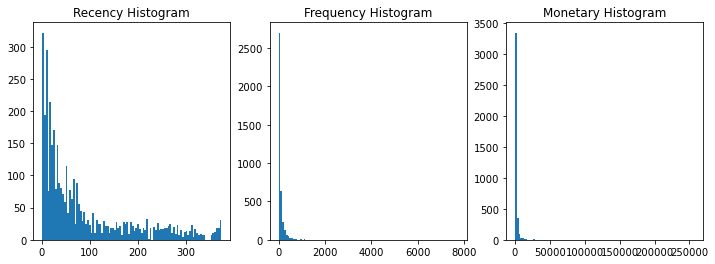

In [57]:
fig, (ax1,ax2,ax3) = plt.subplots(figsize=(12,4), nrows=1, ncols=3)
ax1.set_title('Recency Histogram')
ax1.hist(df_4['Recency'],bins=100)

ax2.set_title('Frequency Histogram')
ax2.hist(df_4['Frequency'],bins=100)

ax3.set_title('Monetary Histogram')
ax3.hist(df_4['Monetary'],bins=100)

In [58]:
df_4[['Recency','Frequency','Monetary']].describe()

,Recency,Frequency,Monetary
count,3891.000000,3891.000000,3891.000000
mean,90.383449,89.152917,1740.843142
std,98.478220,215.165515,6593.477117
min,1.000000,1.000000,2.900000
25%,17.000000,16.000000,293.275000
50%,50.000000,40.000000,638.060000
75%,139.000000,98.000000,1540.055000
max,374.000000,7711.000000,256438.490000


In [59]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, silhouette_samples

X_features = df_4[['Recency','Frequency','Monetary']].values
X_features_scaled = StandardScaler().fit_transform(X_features)

kmeans = KMeans(n_clusters=3, random_state=0)
labels = kmeans.fit(X_features_scaled).labels_
df_4['cluster_label'] = labels

print('실루엣 스코어는 : {0:.3f}'.format(silhouette_score(X_features_scaled,labels)))

실루엣 스코어는 : 0.588


In [60]:
# 여러개의 클러스터링 갯수를 List로 입력 받아 각각의 실루엣 계수를 면적으로 시각화한 함수 작성
def visualize_silhouette(cluster_lists, X_features): 
    
    from sklearn.datasets import make_blobs
    from sklearn.cluster import KMeans
    from sklearn.metrics import silhouette_samples, silhouette_score

    import matplotlib.pyplot as plt
    import matplotlib.cm as cm
    import math
    
    # 입력값으로 클러스터링 갯수들을 리스트로 받아서, 각 갯수별로 클러스터링을 적용하고 실루엣 개수를 구함
    n_cols = len(cluster_lists)
    
    # plt.subplots()으로 리스트에 기재된 클러스터링 수만큼의 sub figures를 가지는 axs 생성 
    fig, axs = plt.subplots(figsize=(4*n_cols, 4), nrows=1, ncols=n_cols)
    
    # 리스트에 기재된 클러스터링 갯수들을 차례로 iteration 수행하면서 실루엣 개수 시각화
    for ind, n_cluster in enumerate(cluster_lists):
        
        # KMeans 클러스터링 수행하고, 실루엣 스코어와 개별 데이터의 실루엣 값 계산. 
        clusterer = KMeans(n_clusters = n_cluster, max_iter=500, random_state=0)
        cluster_labels = clusterer.fit_predict(X_features)
        
        sil_avg = silhouette_score(X_features, cluster_labels)
        sil_values = silhouette_samples(X_features, cluster_labels)
        
        y_lower = 10
        axs[ind].set_title('Number of Cluster : '+ str(n_cluster)+'\n' \
                          'Silhouette Score :' + str(round(sil_avg,3)) )
        axs[ind].set_xlabel("The silhouette coefficient values")
        axs[ind].set_ylabel("Cluster label")
        axs[ind].set_xlim([-0.1, 1])
        axs[ind].set_ylim([0, len(X_features) + (n_cluster + 1) * 10])
        axs[ind].set_yticks([])  # Clear the yaxis labels / ticks
        axs[ind].set_xticks([0, 0.2, 0.4, 0.6, 0.8, 1])
        
        # 클러스터링 갯수별로 fill_betweenx( )형태의 막대 그래프 표현. 
        for i in range(n_cluster):
            ith_cluster_sil_values = sil_values[cluster_labels==i]
            ith_cluster_sil_values.sort()
            
            size_cluster_i = ith_cluster_sil_values.shape[0]
            y_upper = y_lower + size_cluster_i
            
            color = cm.nipy_spectral(float(i) / n_cluster)
            axs[ind].fill_betweenx(np.arange(y_lower, y_upper), 0, ith_cluster_sil_values, \
                                facecolor=color, edgecolor=color, alpha=0.7)
            axs[ind].text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
            y_lower = y_upper + 10
            
        axs[ind].axvline(x=sil_avg, color="red", linestyle="--")

In [61]:
### 여러개의 클러스터링 갯수를 List로 입력 받아 각각의 클러스터링 결과를 시각화 
def visualize_kmeans_plot_multi(cluster_lists, X_features):
    
    from sklearn.cluster import KMeans
    from sklearn.decomposition import PCA
    import pandas as pd
    import numpy as np
    
    # plt.subplots()으로 리스트에 기재된 클러스터링 만큼의 sub figures를 가지는 axs 생성 
    n_cols = len(cluster_lists)
    fig, axs = plt.subplots(figsize=(4*n_cols, 4), nrows=1, ncols=n_cols)
    
    # 입력 데이터의 FEATURE가 여러개일 경우 2차원 데이터 시각화가 어려우므로 PCA 변환하여 2차원 시각화
    pca = PCA(n_components=2)
    pca_transformed = pca.fit_transform(X_features)
    dataframe = pd.DataFrame(pca_transformed, columns=['PCA1','PCA2'])
    
     # 리스트에 기재된 클러스터링 갯수들을 차례로 iteration 수행하면서 KMeans 클러스터링 수행하고 시각화
    for ind, n_cluster in enumerate(cluster_lists):
        
        # KMeans 클러스터링으로 클러스터링 결과를 dataframe에 저장. 
        clusterer = KMeans(n_clusters = n_cluster, max_iter=500, random_state=0)
        cluster_labels = clusterer.fit_predict(pca_transformed)
        dataframe['cluster']=cluster_labels
        
        unique_labels = np.unique(clusterer.labels_)
        markers=['o', 's', '^', 'x', '*']
       
        # 클러스터링 결과값 별로 scatter plot 으로 시각화
        for label in unique_labels:
            label_df = dataframe[dataframe['cluster']==label]
            if label == -1:
                cluster_legend = 'Noise'
            else :
                cluster_legend = 'Cluster '+str(label)           
            axs[ind].scatter(x=label_df['PCA1'], y=label_df['PCA2'], s=70,\
                        edgecolor='k', marker=markers[label], label=cluster_legend)

        axs[ind].set_title('Number of Cluster : '+ str(n_cluster))    
        axs[ind].legend(loc='upper right')
    
    plt.show()

C:\Users\kpo01\AppData\Local\Temp/ipykernel_24944/3935396419.py:36: UserWarning: You passed a edgecolor/edgecolors ('k') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  axs[ind].scatter(x=label_df['PCA1'], y=label_df['PCA2'], s=70,\
C:\Users\kpo01\AppData\Local\Temp/ipykernel_24944/3935396419.py:36: UserWarning: You passed a edgecolor/edgecolors ('k') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  axs[ind].scatter(x=label_df['PCA1'], y=label_df['PCA2'], s=70,\


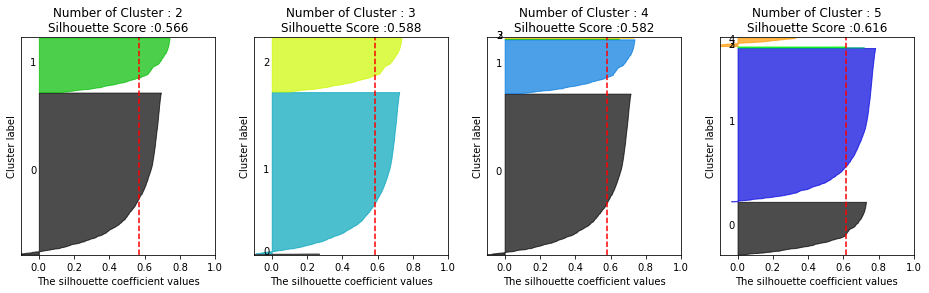

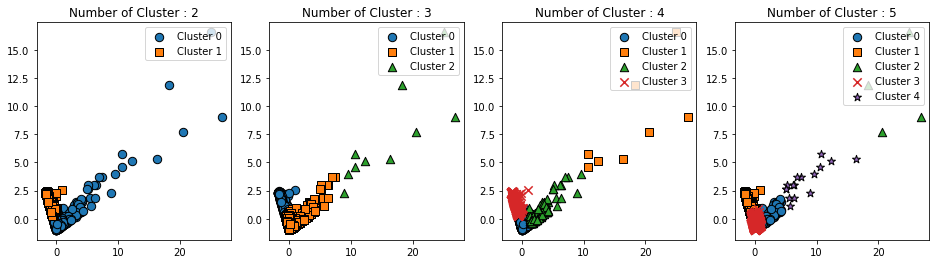

In [62]:
visualize_silhouette([2,3,4,5],X_features_scaled)
visualize_kmeans_plot_multi([2,3,4,5],X_features_scaled)

In [63]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, silhouette_samples

# Recency, Frequecny, Monetary 컬럼에 np.log1p() 로 Log Transformation
df_4['Recency_log'] = np.log1p(df_4['Recency'])
df_4['Frequency_log'] = np.log1p(df_4['Frequency'])
df_4['Monetary_log'] = np.log1p(df_4['Monetary'])

# Log Transformation 데이터에 StandardScaler 적용
X_features = df_4[['Recency_log','Frequency_log','Monetary_log']].values
X_features_scaled = StandardScaler().fit_transform(X_features)

kmeans = KMeans(n_clusters=3, random_state=0)
labels = kmeans.fit_predict(X_features_scaled)
df_4['cluster_label'] = labels

print('실루엣 스코어는 : {0:.3f}'.format(silhouette_score(X_features_scaled,labels)))

실루엣 스코어는 : 0.305


C:\Users\kpo01\AppData\Local\Temp/ipykernel_24944/3935396419.py:36: UserWarning: You passed a edgecolor/edgecolors ('k') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  axs[ind].scatter(x=label_df['PCA1'], y=label_df['PCA2'], s=70,\
C:\Users\kpo01\AppData\Local\Temp/ipykernel_24944/3935396419.py:36: UserWarning: You passed a edgecolor/edgecolors ('k') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  axs[ind].scatter(x=label_df['PCA1'], y=label_df['PCA2'], s=70,\


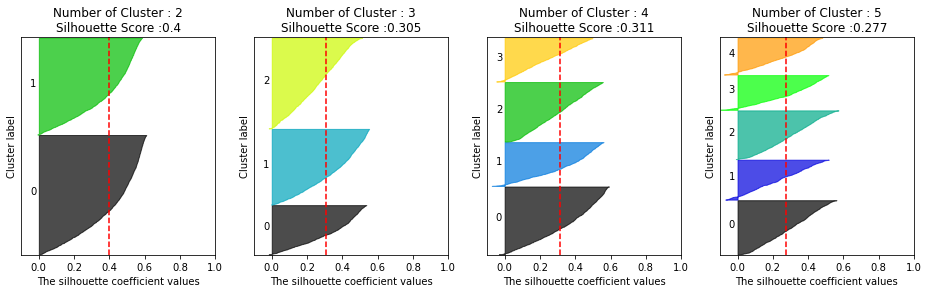

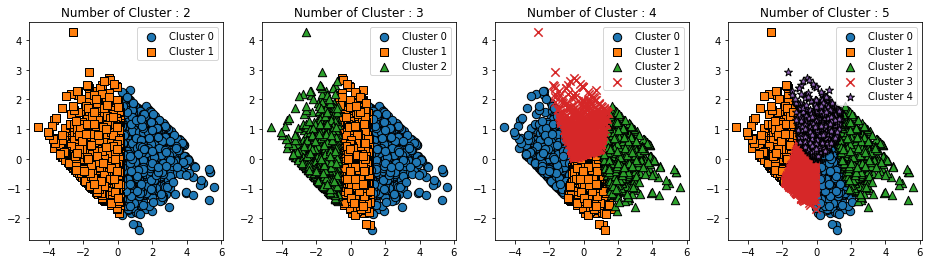

In [69]:
visualize_silhouette([2,3,4,5],X_features_scaled)
visualize_kmeans_plot_multi([2,3,4,5],X_features_scaled)

In [65]:
df_3[df_3.Monetary<=0]

,Frequency,Monetary,Recency
CustomerID,,,
12346.0,0.0,0.000000e+00,326
13256.0,1.0,0.000000e+00,15
13364.0,0.0,0.000000e+00,67
13672.0,-4.0,-7.146000e+01,302
14437.0,4.0,-4.340000e+01,144
14557.0,0.0,0.000000e+00,65
14792.0,0.0,0.000000e+00,64
15802.0,-1.0,-4.514200e+02,143
15823.0,-15.0,-8.407600e+02,338


In [66]:
retail_df.loc[retail_df.CustomerID==17603]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Amount
122282,C546859,M,Manual,-102,2011-03-17 14:39:00,5.45,17603.0,United Kingdom,-555.90
269176,C560435,M,Manual,-1,2011-07-18 16:01:00,294.92,17603.0,United Kingdom,-294.92
269177,C560436,M,Manual,-1,2011-07-18 16:04:00,705.45,17603.0,United Kingdom,-705.45
354250,567868,84949,SILVER HANGING T-LIGHT HOLDER,6,2011-09-22 14:18:00,1.65,17603.0,United Kingdom,9.90
354251,567868,22655,VINTAGE RED KITCHEN CABINET,2,2011-09-22 14:18:00,125.00,17603.0,United Kingdom,250.00
354252,567868,23396,LA JARDIN BOTANIQUE CUSHION COVER,4,2011-09-22 14:18:00,3.75,17603.0,United Kingdom,15.00
354253,567868,23395,BELLE JARDINIERE CUSHION COVER,4,2011-09-22 14:18:00,3.75,17603.0,United Kingdom,15.00
354254,567868,23513,EMBROIDERED RIBBON REEL SUSIE,6,2011-09-22 14:18:00,2.08,17603.0,United Kingdom,12.48
354255,567868,23511,EMBROIDERED RIBBON REEL EMILY,6,2011-09-22 14:18:00,2.08,17603.0,United Kingdom,12.48
354256,567868,23515,EMBROIDERED RIBBON REEL DAISY,6,2011-09-22 14:18:00,2.08,17603.0,United Kingdom,12.48


In [67]:
df_3[df_3.Frequency<=0]

,Frequency,Monetary,Recency
CustomerID,,,
12346.0,0.0,0.000000e+00,326
12908.0,0.0,2.460000e+02,59
13106.0,0.0,5.950000e+01,129
13364.0,0.0,0.000000e+00,67
13672.0,-4.0,-7.146000e+01,302
13762.0,0.0,3.552714e-15,205
14557.0,0.0,0.000000e+00,65
14792.0,0.0,0.000000e+00,64
15100.0,0.0,6.351000e+02,331


In [68]:
retail_df.loc[retail_df.CustomerID==15823]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Amount
4406,536779,BANK CHARGES,Bank Charges,1,2010-12-02 15:08:00,15.00,15823.0,United Kingdom,15.00
45900,C540307,22107,PIZZA PLATE IN BOX,-8,2011-01-06 12:58:00,3.75,15823.0,United Kingdom,-30.00
45901,C540307,22109,FULL ENGLISH BREAKFAST PLATE,-24,2011-01-06 12:58:00,3.39,15823.0,United Kingdom,-81.36
45902,C540307,22303,COFFEE MUG APPLES DESIGN,-18,2011-01-06 12:58:00,2.55,15823.0,United Kingdom,-45.90
45903,C540307,21533,RETROSPOT LARGE MILK JUG,-6,2011-01-06 12:58:00,4.95,15823.0,United Kingdom,-29.70
45904,C540307,21537,RED RETROSPOT PUDDING BOWL,-48,2011-01-06 12:58:00,3.75,15823.0,United Kingdom,-180.00
45905,C540307,22094,RED RETROSPOT TISSUE BOX,-12,2011-01-06 12:58:00,1.25,15823.0,United Kingdom,-15.00
45906,C540307,22093,MOTORING TISSUE BOX,-12,2011-01-06 12:58:00,1.25,15823.0,United Kingdom,-15.00
45907,C540307,22212,FOUR HOOK WHITE LOVEBIRDS,-12,2011-01-06 12:58:00,2.10,15823.0,United Kingdom,-25.20
45908,C540307,22113,GREY HEART HOT WATER BOTTLE,-12,2011-01-06 12:58:00,3.75,15823.0,United Kingdom,-45.00
